In [4]:
import numpy as np
import scipy
import scipy.sparse.linalg
from matplotlib import pyplot as plt

In [33]:
def pixel_centers(M, D, h):
    ja = np.mgrid[0:D] % M
    jb = (np.mgrid[0:D] - ja) / M
    return np.array([ja, jb]) + h/2

In [39]:
def one_hot(values, size=None):
    if not size:
        size = np.max(values) + 1
    return np.eye(size, dtype=int)[values]

In [106]:
# can we assume h = 1 for all Nps?
h = 1

def construct_X(M: int, alphas: np.array, Np: int=None) -> np.array:
    # derived constants
    if not Np:
        # set Np to fit the diagonal of the image
        Np = np.ceil(np.sqrt(2) * M)

    N0 = len(alphas)
    N = N0 * Np
    D = M * M

    # convert alphas to radians
    alphas = np.radians(alphas)
     
    xs = []   
    for alpha in alphas:
        n = np.array([np.cos(alpha), np.sin(alpha)])
        C = pixel_centers(M, D, h)
        p = n.T.dot(C) - (h / 2)
        left_bins = np.floor(p).astype(int)
        right_bins = left_bins + 1

        distr_L = one_hot(left_bins, size=D).T
        distr_R = one_hot(right_bins, size=D).T

        contrib_R = p % h
        contrib_L = 1 - contrib_R

        x = (distr_L.dot(np.diag(contrib_L)) + distr_R.dot(np.diag(contrib_R)))
        xs.append(x)
    return np.concatenate(xs)

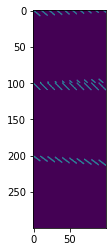

In [107]:
X = construct_X(M=10, alphas=np.array([-33, 1, 42]), Np=15)
plt.imshow(X)
plt.show()

In [108]:
X.shape

(300, 100)

In [109]:
X_ex = np.load("hs_tomography/X_example.npy", allow_pickle=True)

In [110]:
X_ex.shape

(45, 100)

In [111]:
X_ex[0]

array([0.22489321, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [112]:
X[0]

array([0.64701577, 0.51431367, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10237673, 0.9410473 , 0.22028213, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.39640826, 0.76492117, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.6904398 , 0.47088963, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.14580076, 0.98447133, 0.1768581 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.4398323 , 0.72149714,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.73386383,
       0.4274656 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18922

# 2 Recovering the Image

<h3 style="color: red;">TODO: use constructed matrix </h3>

In [10]:
X = np.load("hs_tomography/X_77.npy", allow_pickle=True)
X = scipy.sparse.csc_matrix(X.all())

y = np.load("hs_tomography/y_77.npy", allow_pickle=True)
alphas = np.load("hs_tomography/alphas_77.npy", allow_pickle=True)

### Sparsity of X

In [33]:
zero_elements = 100 - 100 * (X.count_nonzero() / np.multiply(*X.shape))
print(f"In X {zero_elements:.2f}% of the elements are zero")

In X 98.17% of the elements are zero


In [55]:
beta, solution, *_ = scipy.sparse.linalg.lsqr(X, y, atol=1e-5, btol=1e-5)

assert solution == 1

In [58]:
np.sqrt(beta.shape)

array([77.])

In [61]:
img = beta.reshape((77, 77))

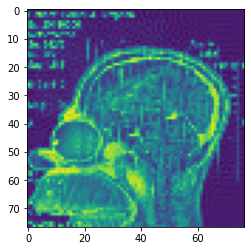

In [62]:
plt.imshow(img)
plt.show()